<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Estatistica_undersampling_Oversampling_DadosDesbalanceados_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import random
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/content/csv_result-ebay_confianca_completo.csv')

In [3]:
data.shape

(5806, 75)

In [4]:
data.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,cconscientiousness,sconscientiousness,magreeableness,cagreeableness,sagreeableness,mopenness,copenness,sopenness,agreeablenessIndico,conscientiousnessIndico,extraversionIndico,opennessIndico,openessWatson,conscientiousnessWatson,extraversionWatson,agreeablenessWatson,neuroticismWatson,o_adventure,o_artistic,o_emotionality,o_imagination,o_intelect,o_liberalism,c_achievement,c_cautiouness,c_dutifulness,c_orderliness,c_discipline,c_efficacy,e_activity,e_assertiveness,e_cheerfulness,e_excitement,e_friend,e_gregariouness,a_altruism,a_cooperation,a_modesty,a_morality,a_simpathy,a_trust,n_anger,n_anxiety,n_depression,n_immoderation,n_selfconsciouness,n_vulnerability,need_chalenge,need_closeness,need_curiosity,need_excitement,need_harmony,need_ideal,need_liberty,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,0.5,0,4.110703,0.4,0,5.645506,0.6,1,0.684026,0.410566,0.646393,0.541885,0.835889,0.607272,0.589781,0.797063,0.449051,0.479940,0.753559,0.744320,0.758126,0.684179,0.526194,0.683279,0.559430,0.667665,0.522323,0.570964,0.746656,0.496348,0.649539,0.577345,0.553578,0.541931,0.350008,0.750762,0.626144,0.476133,0.701773,0.764204,0.512819,0.569980,0.611817,0.446330,0.468466,0.542865,0.442188,0.587795,0.833622,0.810144,0.462635,0.852183,0.628620,0.681354,0.820817,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,0.5,0,3.806675,0.4,0,6.190563,0.6,1,0.464647,0.431002,0.569719,0.588085,0.830316,0.572403,0.564882,0.722874,0.461567,0.478643,0.710639,0.701289,0.782399,0.716377,0.547235,0.657048,0.510715,0.654974,0.505224,0.543689,0.754035,0.463572,0.667516,0.547494,0.580140,0.514974,0.327534,0.724414,0.556060,0.424484,0.610452,0.757238,0.514746,0.595900,0.623953,0.500948,0.467786,0.569568,0.408936,0.596168,0.766870,0.790915,0.473358,0.800680,0.628022,0.667925,0.785016,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,0.5,0,4.307670,0.4,0,5.834547,0.8,1,0.574335,0.438136,0.594625,0.536566,0.849708,0.582639,0.577375,0.752931,0.451419,0.510756,0.737884,0.676704,0.785777,0.684304,0.577079,0.658175,0.517050,0.639082,0.509898,0.520291,0.725458,0.487635,0.578349,0.528123,0.555361,0.474853,0.326494,0.678454,0.619364,0.453175,0.678154,0.694500,0.525181,0.579213,0.619524,0.519524,0.479714,0.611395,0.482310,0.641673,0.755555,0.818792,0.506326,0.798245,0.617355,0.700126,0.735538,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,0.7,0,4.613918,0.5,1,4.348694,0.7,1,0.574341,0.514639,0.514115,0.495976,0.790834,0.674920,0.646031,0.763297,0.549710,0.489649,0.646631,0.608902,0.677307,0.614726,0.488001,0.712907,0.549355,0.664191,0.538321,0.596186,0.756297,0.585698,0.624495,0.582153,0.520175,0.525256,0.373468,0.661293,0.656178,0.414692,0.648699,0.612588,0.611793,0.545152,0.545936,0.449869,0.435871,0.523706,0.440116,0.675587,0.751850,0.813193,0.556613,0.775064,0.700630,0.701459,0.690972,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,0.5,1,4.743250,0.3,0,4.486198,0.7,1,0.627522,0.542976,0.485505,0.485903,0.786669,0.670957,0.540510,0.764619,0.529810,0.473329,0.663005,0.608885,0.695995,0.601024,0.477730,0.702990,0.554734,0.667045,0.529989,0.574750,0.733478,0.563220,0.540472,0.565630,0.504446,0.493837,0.343277,0.644033,0.713643,0.449867,0.670262,0.618680,0.596047,0.516514,0.583900,0.494273,0.412867,0.575115,0.481213,0.621911,0.779859,0.786455,0.486580,0.808006,0.641099,0.686376,0.724988,0.718530,0.616852,0.692761,0.646695,0.677245,0.699

In [5]:
data['blacklist'] = data['blacklist'] == 'S'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


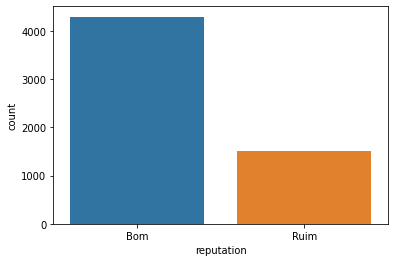

In [7]:
sns.countplot(data['reputation']);

In [8]:
len(data.columns)

75

In [9]:
x = data.iloc[:,0:74].values

In [10]:
x.shape

(5806, 74)

In [11]:
x

array([[0, 49, False, ..., 0.6400725899947721, 0.5980370415548721,
        0.828716381071851],
       [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
        0.8093789692710098],
       [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
        0.8260389012547199],
       ...,
       [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
        0.8320726536961992],
       [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
        0.8199238314070743],
       [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
        0.7920921058167003]], dtype=object)

In [12]:
y = data.iloc[:,74].values

In [13]:
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

In [14]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

**Treinamento**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y)

In [17]:
x_treinamento.shape, y_treinamento.shape

((4644, 74), (4644,))

In [18]:
x_teste.shape, y_teste.shape

((1162, 74), (1162,))

Problema de classificação, vamos utilizar o algoritimo de **Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
modelo = RandomForestClassifier(n_estimators=50, criterion='entropy')
modelo.fit(x_treinamento, y_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [22]:
previsoes = modelo.predict(x_teste)
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.7418244406196214

In [24]:
#modelo com resultado bom de 74%, ou seja, preveu corretamente 74%

**Subamostragem (undersampling)- Tomek links**



In [25]:
from imblearn.under_sampling import TomekLinks

In [26]:
tl = TomekLinks(sampling_strategy='majority')
x_under, y_under = tl.fit_resample(x, y)

In [27]:
x_under.shape, y_under.shape

((5417, 74), (5417,))

In [28]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [29]:
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))

In [30]:
x_treinamento_u, x_teste_u, y_treinamento_u, y_teste_u = train_test_split(x_under, y_under, 
                                                                          test_size = 0.2, stratify = y_under)
x_treinamento_u.shape, x_teste_u.shape

((4333, 74), (1084, 74))

In [31]:
modelo_u = RandomForestClassifier()
modelo_u.fit(x_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(x_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.7260147601476015

In [33]:
#aqui a acurácia diminui para 72% aplicando o undersampling

**Sobreamostragem (oversampling) - SMOTE**

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(sampling_strategy='minority')
x_over, y_over = smote.fit_resample(x, y)

In [36]:
x_over.shape, y_over.shape

((8598, 74), (8598,))

In [37]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [38]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [39]:
x_treinamento_o, x_teste_o, y_treinamento_o, y_teste_o = train_test_split(x_over, y_over, 
                                                                          test_size = 0.2, stratify = y_over)
x_treinamento_o.shape, x_teste_o.shape

((6878, 74), (1720, 74))

In [40]:
modelo_o = RandomForestClassifier()
modelo_o.fit(x_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(x_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.7947674418604651

aplicando o oversampling, melhoramos a acurácia do modelo para quase 80%

Portanto fizemos a previsao usando o algoritimo de RF, e a partir disso trabalhamos usando dados balanceados, tanto com undersampling, como oversampling